In [511]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Importing libraries

In [512]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [513]:
## Pandas Display options
pd.set_option('display.max_columns',0)
pd.set_option('display.max_colwidth',0)

## Read data

In [514]:
## Reading relevant data
match_lvl_data = pd.read_csv('match_level_scorecard.csv')
batsman_lvl_data = pd.read_csv('batsman_level_scorecard.csv')
bowler_lvl_data = pd.read_csv('bowler_level_scorecard.csv')
train_data = pd.read_csv('train_data_with_samplefeatures.csv')
test_data = pd.read_csv('test_data_with_samplefeatures.csv')

## Data Cleaning
### Handling Missing values

In [515]:
## Check Null Values
##Check features with nan value
train_data.isnull().sum()

match id                     0 
team1                        0 
team1_id                     0 
team1_roster_ids             0 
team2                        0 
team2_id                     0 
team2_roster_ids             0 
winner                       0 
winner_id                    0 
toss winner                  0 
toss decision                0 
venue                        0 
city                         0 
match_dt                     0 
lighting                     0 
series_name                  0 
season                       0 
ground_id                    0 
team_count_50runs_last15     0 
team_winp_last5              0 
team1only_avg_runs_last15    21
team1_winp_team2_last15      0 
ground_avg_runs_last15       53
dtype: int64

In [516]:
train_data.describe()

match id      team1_id  ...  team1_winp_team2_last15  ground_avg_runs_last15
count  9.480000e+02  948.000000    ...  948.000000               895.000000            
mean   9.323234e+06  21921.722574  ...  40.991561                153.822446            
std    2.302622e+05  17657.672717  ...  37.948831                13.971631             
min    8.797053e+06  20.000000     ...  0.000000                 81.500000             
25%    9.097078e+06  6838.000000   ...  0.000000                 145.381818            
50%    9.330600e+06  18360.000000  ...  40.000000                154.666667            
75%    9.484520e+06  36126.000000  ...  66.670000                162.426768            
max    9.887863e+06  49657.000000  ...  100.000000               209.500000            

[8 rows x 10 columns]

# Printing shape and sample rows of each dataset

In [517]:
train_data.shape
train_data.head(2)

(948, 23)

match id team1  team1_id  ... team1only_avg_runs_last15 team1_winp_team2_last15  ground_avg_runs_last15
0  9331181   Ba    11283     ...  139.0                     100.0                   157.178571            
1  8797060   Ed    20        ...  156.0                     50.0                    103.500000            

[2 rows x 23 columns]

In [518]:
test_data.shape
test_data.head(2)

(271, 21)

match id     team1  team1_id  ... team1only_avg_runs_last15 team1_winp_team2_last15  ground_avg_runs_last15
0  9250275   Jy        28594     ... NaN                        0.00                   NaN                    
1  9262189   Ga An Ws  36084     ...  151.285714                66.67                   153.5                 

[2 rows x 21 columns]

In [519]:
match_lvl_data.shape
match_lvl_data.head(2)

(1689, 30)

match id  team1  team2  ...     series_type winner_id  player_of_the_match_id
0  8638034   Nn Ds  Wn     ...  other_domestic  18570    NaN                    
1  8588005   Me Rs  Sy Tr  ...  other_domestic  33963     1749075.0             

[2 rows x 30 columns]

In [520]:
batsman_lvl_data.shape
batsman_lvl_data.head(2)

(24483, 21)

match id batsman  batsman_id                           batsman_details  ...  strike_rate  Fours  Sixes    match_dt
0  8638034   KD Ce   7907451.0   NZ:Right-hand bat:Right-arm medium-fast:  ...  140.0        1.0   NaN     2021-01-01
1  8638034   TL St   4381761.0   NZ:Right-hand bat:None:                   ...  100.0        4.0    1.0    2021-01-01

[2 rows x 21 columns]

In [521]:
bowler_lvl_data.shape
bowler_lvl_data.head(2)

(18539, 18)

match id bowler  bowler_id                            bowler_details  ...  Sixes  wides  noballs    match_dt
0  8638034   BV Ss  6718396.0  NZ:Right-hand bat:Right-arm medium-fast:  ...  1      3      1        2021-01-01
1  8638034   HK Bt  1585464.0  NZ:Left-hand bat:Right-arm medium-fast:   ...  1      2      0        2021-01-01

[2 rows x 18 columns]

#### Create dependent column

In [522]:
## Creating a binary winner column - 0 if team1 wins, else 1
train_data['winner_01'] = train_data.apply(lambda x: 1 if (x['team2']==x['winner']) else 0, axis=1)

#### Pre process

In [523]:
## Toss winner to numerical - 1 if team2 wins, else 0

train_data['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [524]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

train_data['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [525]:
# ## Code to plot RnP

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
import re

def createRnP(X_12, feature, N=5, ylim_lb=0.3, ylim_ub=0.7):
    
    df = X_12.copy()
    df[f'{feature}_bin'] = df[feature].rank(pct=True)//(1/N) # divide feature values for all games in 5 equi-volume buckets.
    df['count'] = 1
    df['team1_win%'] = df['winner_01'].apply(lambda x: 1-x) # invert winner_01 to get team1 winner indicator
    df['team2_win%'] = df['winner_01'].copy()
    df[f'{feature}_min'] = df[feature].copy()
    df[f'{feature}_max'] = df[feature].copy()
    df_g = df.groupby(f'{feature}_bin').agg({'team1_win%':'mean', 'team2_win%':'mean', 'count':'sum', f'{feature}_min':'min',\
                                            f'{feature}_max':'max'}).reset_index()
    N = min(N,df_g.shape[0])
    blue_bar = df_g['team1_win%'].values.tolist()
    ind = np.arange(N)
    # plotting starts
    plt.figure(figsize=(10,5));
    plt.bar(ind, blue_bar, label='Team 1 win%');
    plt.axhline(y=0.5, linewidth=0.5, color='k', linestyle = '--')
    xlabel = re.sub('team_','ratio_',feature)
    plt.xlabel(f'{xlabel} (team1 / team2) bins');
    plt.ylabel('Win %');
    plt.title(f'RnP - {feature} vs win');
    df_g['xticks'] = df_g.apply(lambda x: str(round(x[f'{feature}_min'],2)) + ' - ' + str(round(x[f'{feature}_max'],2)), axis=1)
    plt.xticks(ind, df_g['xticks']);
    plt.ylim([ylim_lb,ylim_ub]);
    plt.legend(loc='best');
    x2,x1 = blue_bar[-1],blue_bar[0]
    slope = x2/x1
    if slope < 1:
        slope = 1/slope
        x1,x2 = x2,x1
    print('slope:', round(x2,2),'/',round(x1,2), '= ',round(slope,2))
    plt.show();

In [526]:
# #### Helper function

def giveLastNgamesPlayer(player_id, date, n, bat_or_bowl):
    
    if bat_or_bowl == 'bat':
        df_topick = batsman_lvl_data
        id_col = 'batsman_id'
    else:
        df_topick = bowler_lvl_data
        id_col = 'bowler_id'
        
    return df_topick[(df_topick['match_dt']<date)&(df_topick[id_col]==float(player_id))]\
                .sort_values(by='match_dt', ascending=False).head(n)

# ### 1. team_avg_Econ_last10 <br>
# Ratio of team's avg inning economy ratio in last 10 games

In [527]:
## derived feature computed using toss winner & toss decision to denote the inning team1 bats.
# If team1 won the toss and chose to bat or team2 won the toss and chose to bowl, the feature takes the value 1, else 2.
match_lvl_data['team1_bat_inning'] = np.where( ((match_lvl_data['team1']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='bat'))|\
                                               ((match_lvl_data['team2']==match_lvl_data['toss winner'])&(match_lvl_data['toss decision']=='field')) , 1, 2)

In [528]:
match_lvl_data.head(2)

match id  team1  team2 winner  ...     series_type  winner_id player_of_the_match_id team1_bat_inning
0  8638034   Nn Ds  Wn     Wn     ...  other_domestic  18570     NaN                     1              
1  8588005   Me Rs  Sy Tr  Sy Tr  ...  other_domestic  33963      1749075.0              1              

[2 rows x 31 columns]

In [529]:
def teamAvgEconLastn(team_id, date, n):
    
    # filter out games with either team1/2_id as input team_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df_rel = match_lvl_data[(match_lvl_data['match_dt']<date)&\
                      ((match_lvl_data['team1_id']==team_id)|(match_lvl_data['team2_id']==team_id))]\
                        .sort_values(by='match_dt', ascending=False).head(n)
    # combine two dataframes - one where input team is batting first, and another one where input team is batting second.
    # Separate and rename the runs and balls data for consistency
    df_runs = pd.concat([
        df_rel[df_rel['team1_bat_inning'] == 1][['inning2_runs']].rename(columns={'inning2_runs': 'runs'}),
        df_rel[df_rel['team1_bat_inning'] == 2][['inning1_runs']].rename(columns={'inning1_runs': 'runs'})
    ])
    
    df_balls = pd.concat([
        df_rel[df_rel['team1_bat_inning'] == 1][['inning2_balls']].rename(columns={'inning2_balls': 'balls'}),
        df_rel[df_rel['team1_bat_inning'] == 2][['inning1_balls']].rename(columns={'inning1_balls': 'balls'})
    ])
    
    # Combine the runs and balls dataframes
    df_combined = pd.concat([df_runs.reset_index(drop=True), df_balls.reset_index(drop=True)], axis=1)

    # Calculate the average economy rate (runs per ball)
    df_combined['avgEcon'] = df_combined['runs'] / df_combined['balls']

    # Return the mean of the average economy rate
    return df_combined['avgEcon'].mean() 

In [530]:
# Computing average Economy in last 10 games for team1 for train dataset.
train_data['team1_avg_Econ_last10'] = train_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team1_id'], x['match_dt'], 10), axis=1)
# Computing average Economy in last 10 games for team2 for train dataset.
train_data['team2_avg_Econ_last10'] = train_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team2_id'], x['match_dt'], 10), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:06<00:00, 146.55it/s]


In [531]:
# Taking ratio of (average Economy in last 10 games for team1) to (average Economy in last 10 games for team2). Adding 1 to handle divide by zero exceptions.
train_data['team_avg_Econ_last10'] = (train_data['team1_avg_Econ_last10']+1)/(train_data['team2_avg_Econ_last10']+1)
train_data.drop(columns=['team1_avg_Econ_last10','team2_avg_Econ_last10'], inplace=True) # dropping intermediate columns

In [532]:
train_data.shape
train_data.tail(2)

(948, 27)

match id  team1  team1_id  ... toss_winner_01 toss_decision_01  team_avg_Econ_last10
946  9516695   Rn Rs  30428     ...  0              1                0.977715            
947  9433633   He     7727      ...  1              0                0.983385            

[2 rows x 27 columns]

slope: 0.46 / 0.46 =  1.01


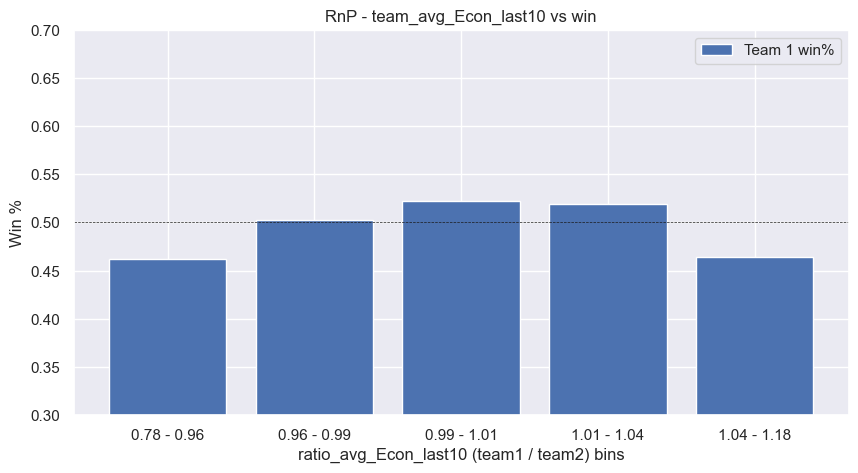

In [533]:
# RnP of team_avg_Econ_last10 computed over the train data. Slope denotes ratio of right most bin to left most bin.
createRnP(train_data, 'team_avg_Econ_last10')

In [534]:
## Doing similar process for test dataset

test_data['team1_avg_Econ_last10'] = test_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team1_id'], x['match_dt'], 10), axis=1)
test_data['team2_avg_Econ_last10'] = test_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team2_id'], x['match_dt'], 10), axis=1)
test_data['team_avg_Econ_last10'] = (test_data['team1_avg_Econ_last10']+1)/(test_data['team2_avg_Econ_last10']+1)
test_data.drop(columns=['team1_avg_Econ_last10','team2_avg_Econ_last10'], inplace=True) # dropping intermediate columns
test_data.shape
test_data.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 167.18it/s]


(271, 24)

match id     team1  team1_id  ... toss_winner_01 toss_decision_01  team_avg_Econ_last10
0  9250275   Jy        28594     ...  1              0               NaN                  
1  9262189   Ga An Ws  36084     ...  1              0                1.031257            

[2 rows x 24 columns]

# ###2.team_srrate_ratio_last10 <br>
## Ratio of the average weighted strike rate of the top 3 batsman in the last 10 games

In [535]:
def get_last_10_matches(team_id, match2, match_date):
    team_matches = match2[((match2['team1_id'] == team_id) | (match2['team2_id'] == team_id)) & (match2['match_dt'] < match_date)]
    team_matches = team_matches.sort_values(by='match_dt', ascending=False).head(10)
    return team_matches['match id'].tolist()

In [536]:
def srT3Lastn(player_list, date, n):
    player_list = str(player_list).split(':')  # split string of ':' separated ids into a list of ids
    strike_rate_list = []
    
    for player in player_list:  # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat')  # getting batting stats from last n games for each player
        total_runs = np.nansum(df_rel['runs'])  # Sum up number of runs for the player
        total_balls_faced = np.nansum(df_rel['balls_faced'])  # Sum up number of balls faced for the player
        strike_rate = (total_runs / total_balls_faced) * 100 if total_balls_faced > 0 else 0  # Calculate strike rate
        
        strike_rate_list.append((player, strike_rate, total_balls_faced))  # Append the player id, strike rate, and total balls faced as a tuple to the list
    
    # Sort the list by strike rate in descending order and take the top 3
    top_3_batsmen = sorted(strike_rate_list, key=lambda x: x[1], reverse=True)[:3]
    
    weighted_sr_list = []
    total_balls_top_3 = sum([batsman[2] for batsman in top_3_batsmen])  # Sum up the total balls faced by top 3 batsmen
    
    if total_balls_top_3 > 0:  # Ensure no division by zero
        for batsman in top_3_batsmen:
            weighted_sr_list.append(batsman[1] * (batsman[2] / total_balls_top_3))  # Weighted strike rate contribution
    
    return sum(weighted_sr_list) if top_3_batsmen else 0

In [537]:
# Applying the function to compute the number of wickets taken by top 3 bowlers for team1 and team2

tqdm.pandas() # to use progress_apply

# Training dataset
train_data['team1_srrate_top3_last10'] = train_data.progress_apply(lambda x: \
            srT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
train_data['team2_srrate_top3_last10'] = train_data.progress_apply(lambda x: \
            srT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:27<00:00, 34.38it/s]


In [538]:
# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
train_data['team_srrate_ratio_last10'] = (train_data['team1_srrate_top3_last10'] + 1) / (train_data['team2_srrate_top3_last10'] + 1)
# Dropping intermediate columns
train_data.drop(columns=['team1_srrate_top3_last10', 'team2_srrate_top3_last10'], inplace=True)

In [539]:
train_data.head()

match id     team1  team1_id  ... toss_decision_01 team_avg_Econ_last10  team_srrate_ratio_last10
0  9331181   Ba        11283     ...  0                0.988176             1.068458                
1  8797060   Ed        20        ...  0                1.032209             0.917698                
2  9433269   We        10576     ...  0                0.971167             0.946543                
3  9587073   Ga An Ws  36084     ...  1                1.000301             1.272555                
4  9516457   Pb Ks     30407     ...  0                1.030384             0.955331                

[5 rows x 28 columns]

slope: 0.58 / 0.38 =  1.52


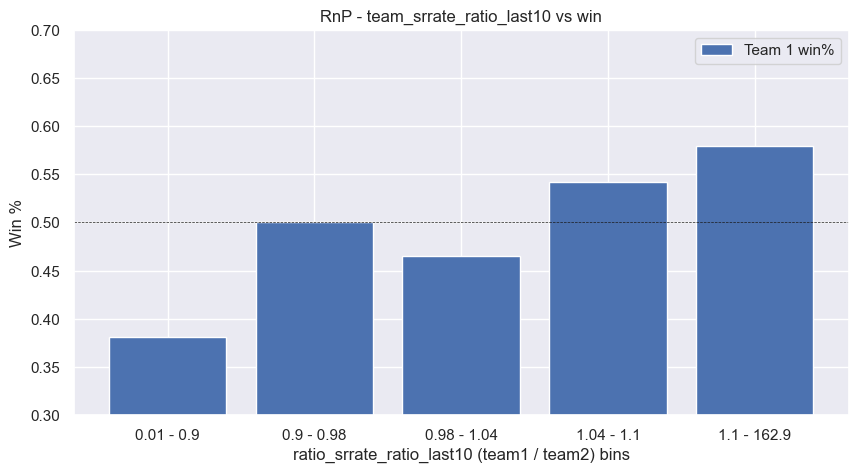

In [540]:
# RnP of team_count_50runs_last15 computed over the train data. Slope denotes ratio of right most bin to left most bin.
createRnP(train_data, 'team_srrate_ratio_last10')

In [541]:
## Doing similar process for test dataset

test_data['team1_srrate_top3_last10'] = test_data.progress_apply(lambda x: \
            srT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_srrate_top3_last10'] = test_data.progress_apply(lambda x: \
            srT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
test_data['team_srrate_ratio_last10'] = (test_data['team1_srrate_top3_last10'] + 1) / (test_data['team2_srrate_top3_last10'] + 1)

# Dropping intermediate columns
test_data.drop(columns=['team1_srrate_top3_last10', 'team2_srrate_top3_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:07<00:00, 35.66it/s]


In [542]:
test_data.head()

match id     team1  team1_id  ... toss_decision_01 team_avg_Econ_last10  team_srrate_ratio_last10
0  9250275   Jy        28594     ...  0               NaN                   0.641747                
1  9262189   Ga An Ws  36084     ...  0                1.031257             1.041926                
2  9128776   Rn Rs     30428     ...  1                1.004421             0.948144                
3  9586919   Ja Ts     36098     ...  0                0.968635             0.850659                
4  9128538   Ci Sr Ks  30414     ...  0                1.036358             1.186951                

[5 rows x 25 columns]

# ###3. team_runs_ratio_last10 <br>
## Ratio of runs scored by top 3 batsmen of both teams

In [543]:
def runsT3Lastn(player_list, date, n):
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    runs_list = []
    
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bat') # getting bowling stats from last n games for each player
        total_runs = np.nansum(df_rel['runs']) # Sum up number of runs for the player
        runs_list.append((player, total_runs)) # Append the player id and total wickets as a tuple to the list
    
    # Sort the list by total runs in descending order and take the top 3
    top_3_batsmen = sorted(runs_list, key=lambda x: x[1], reverse=True)[:3]
    
    # Sum up the runs taken by the top 3 bowlers
    total_runs_top_3 = sum([batsman[1] for batsman in top_3_batsmen])
    
    return total_runs_top_3

In [544]:
# Applying the function to compute the number of wickets taken by top 3 bowlers for team1 and team2

tqdm.pandas() # to use progress_apply

# Training dataset
train_data['team1_runs_top3_last10'] = train_data.progress_apply(lambda x: \
            runsT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
train_data['team2_runs_top3_last10'] = train_data.progress_apply(lambda x: \
            runsT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:28<00:00, 33.36it/s]


In [545]:
# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
train_data['team_runs_ratio_last10'] = (train_data['team1_runs_top3_last10'] + 1) / (train_data['team2_runs_top3_last10'] + 1)
# Dropping intermediate columns
train_data.drop(columns=['team1_runs_top3_last10', 'team2_runs_top3_last10'], inplace=True)

In [546]:
train_data.head()

match id     team1  team1_id  ... team_avg_Econ_last10 team_srrate_ratio_last10  team_runs_ratio_last10
0  9331181   Ba        11283     ...  0.988176             1.068458                 0.988662              
1  8797060   Ed        20        ...  1.032209             0.917698                 0.884000              
2  9433269   We        10576     ...  0.971167             0.946543                 0.778286              
3  9587073   Ga An Ws  36084     ...  1.000301             1.272555                 1.683241              
4  9516457   Pb Ks     30407     ...  1.030384             0.955331                 0.923155              

[5 rows x 29 columns]

slope: 0.62 / 0.41 =  1.52


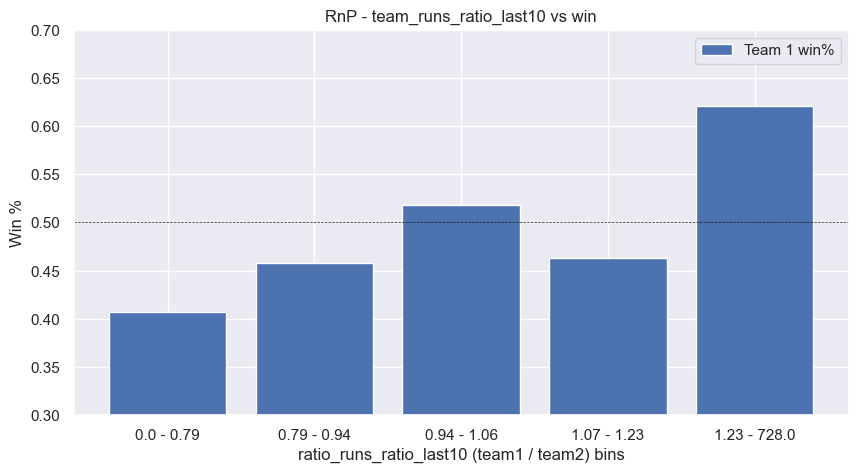

In [547]:
# RnP of team_count_50runs_last15 computed over the train data. Slope denotes ratio of right most bin to left most bin.
createRnP(train_data, 'team_runs_ratio_last10')

In [548]:
train_data.head()

match id     team1  team1_id  ... team_avg_Econ_last10 team_srrate_ratio_last10  team_runs_ratio_last10
0  9331181   Ba        11283     ...  0.988176             1.068458                 0.988662              
1  8797060   Ed        20        ...  1.032209             0.917698                 0.884000              
2  9433269   We        10576     ...  0.971167             0.946543                 0.778286              
3  9587073   Ga An Ws  36084     ...  1.000301             1.272555                 1.683241              
4  9516457   Pb Ks     30407     ...  1.030384             0.955331                 0.923155              

[5 rows x 29 columns]

In [549]:
## Doing similar process for test dataset

test_data['team1_runs_top3_last10'] = test_data.progress_apply(lambda x: \
            runsT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_runs_top3_last10'] = test_data.progress_apply(lambda x: \
            runsT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
test_data['team_runs_ratio_last10'] = (test_data['team1_runs_top3_last10'] + 1) / (test_data['team2_runs_top3_last10'] + 1)

# Dropping intermediate columns
test_data.drop(columns=['team1_runs_top3_last10', 'team2_runs_top3_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:07<00:00, 34.05it/s]


In [550]:
test_data.head()

match id     team1  team1_id  ... team_avg_Econ_last10 team_srrate_ratio_last10  team_runs_ratio_last10
0  9250275   Jy        28594     ... NaN                   0.641747                 0.111628              
1  9262189   Ga An Ws  36084     ...  1.031257             1.041926                 0.873979              
2  9128776   Rn Rs     30428     ...  1.004421             0.948144                 0.957328              
3  9586919   Ja Ts     36098     ...  0.968635             0.850659                 0.759276              
4  9128538   Ci Sr Ks  30414     ...  1.036358             1.186951                 1.080958              

[5 rows x 26 columns]

# ###4.percentage_dot_balls_bowled_last_5 <br>
## Ratio of percentage of dot balls bowled by each team in the last 5 games

In [551]:
def get_last_5_matches(team_id, match2, match_date):
    team_matches = match2[((match2['team1_id'] == team_id) | (match2['team2_id'] == team_id)) & (match2['match_dt'] < match_date)]
    team_matches = team_matches.sort_values(by='match_dt', ascending=False).head(5)
    return team_matches['match id'].tolist()

In [552]:
train_data_new1=train_data
test_data_new1=test_data

In [553]:
## Toss winner to numerical - 1 if team2 wins, else 0

match_lvl_data['toss_winner_01'] = np.where(match_lvl_data['toss winner']==match_lvl_data['team2'], 1, 0)

In [554]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

match_lvl_data['toss_decision_01'] = np.where(match_lvl_data['toss decision']=='bat', 1, 0)

In [564]:
def ratio_dot_balls_bowled(match_id, team_id, bowler_df, train_df):
    match_data = train_df[train_df['match id'] == match_id]
    
    if len(match_data) == 0:
        print(f"No match data found for Match ID: {match_id}")
        return 0
    if match_data.iloc[0]['team1_id'] == team_id:
        team_roster_ids_req = match_data.iloc[0]['team1_roster_ids'].split(':')
        team_roster_ids_other=match_data.iloc[0]['team2_roster_ids'].split(':')
    elif match_data.iloc[0]['team2_id'] == team_id:
        team_roster_ids_req = match_data.iloc[0]['team2_roster_ids'].split(':')
        team_roster_ids_other=match_data.iloc[0]['team1_roster_ids'].split(':')
        
    else:
        print(f"Team ID {team_id} not found in Match ID {match_id}")
        return 0
    team_roster_ids_req = [id.split('.')[0] for id in team_roster_ids_req]
    team_roster_ids_other = [id.split('.')[0] for id in team_roster_ids_other]
    
    match_bowler_data = bowler_df[bowler_df['match id'] == match_id].copy()
    match_bowler_data['bowler_id'] = match_bowler_data['bowler_id'].astype(str)
    match_bowler_data['bowler_id'] = match_bowler_data['bowler_id'].apply(lambda x: x.split('.')[0])  
    team_bowlers_req = match_bowler_data[match_bowler_data['bowler_id'].isin(team_roster_ids_req)]
    team_bowlers_other = match_bowler_data[match_bowler_data['bowler_id'].isin(team_roster_ids_other)]
    dot_balls_bowled_req = team_bowlers_req['dots'].sum()
    dot_balls_bowled_other = team_bowlers_other['dots'].sum()
    if dot_balls_bowled_other==0:
        ratio_dot_balls_bowled=20
    else:
        ratio_dot_balls_bowled=dot_balls_bowled_req/dot_balls_bowled_other
    
    return ratio_dot_balls_bowled

In [565]:
ratio_dot_balls_ratio = []
for index, row in train_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    team1_ratio_dotballs_bowled = []
    team2_ratio_dotballs_bowled = []

    for match in team1_last_5_matches:
        team1_ratio_dotballs_bowled.append(ratio_dot_balls_bowled(match, team1_id, bowler_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        team2_ratio_dotballs_bowled.append(ratio_dot_balls_bowled(match, team2_id, bowler_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        ratio_dot_balls_ratio.append(1)
        continue
    else:
        ratio_dot_balls_ratio.append(((sum(team1_ratio_dotballs_bowled)/len(team1_last_5_matches))+1)/((sum(team2_ratio_dotballs_bowled)/len(team2_last_5_matches))+1))

In [566]:
train_data['ratio_dot_balls_bowled_last_5']=ratio_dot_balls_ratio

In [567]:
train_data.head()

match id     team1  team1_id  ... team_srrate_ratio_last10 team_runs_ratio_last10  ratio_dot_balls_bowled_last_5
0  9331181   Ba        11283     ...  1.068458                 0.988662               0.558198                     
1  8797060   Ed        20        ...  0.917698                 0.884000               0.964300                     
2  9433269   We        10576     ...  0.946543                 0.778286               0.807738                     
3  9587073   Ga An Ws  36084     ...  1.272555                 1.683241               1.087867                     
4  9516457   Pb Ks     30407     ...  0.955331                 0.923155               1.060779                     

[5 rows x 30 columns]

In [568]:
ratio_dot_balls_ratio = []
for index, row in test_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    team1_ratio_dotballs_bowled = []
    team2_ratio_dotballs_bowled = []

    for match in team1_last_5_matches:
        team1_ratio_dotballs_bowled.append(ratio_dot_balls_bowled(match, team1_id, bowler_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        team2_ratio_dotballs_bowled.append(ratio_dot_balls_bowled(match, team2_id, bowler_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        ratio_dot_balls_ratio.append(1)
        continue
    else:
        ratio_dot_balls_ratio.append(((sum(team1_ratio_dotballs_bowled)/len(team1_last_5_matches))+1)/((sum(team2_ratio_dotballs_bowled)/len(team2_last_5_matches))+1))

In [569]:
test_data['ratio_dot_balls_bowled_last_5']=ratio_dot_balls_ratio

In [570]:
test_data.head()

match id     team1  team1_id  ... team_srrate_ratio_last10 team_runs_ratio_last10  ratio_dot_balls_bowled_last_5
0  9250275   Jy        28594     ...  0.641747                 0.111628               1.000000                     
1  9262189   Ga An Ws  36084     ...  1.041926                 0.873979               1.071743                     
2  9128776   Rn Rs     30428     ...  0.948144                 0.957328               0.966322                     
3  9586919   Ja Ts     36098     ...  0.850659                 0.759276               0.950695                     
4  9128538   Ci Sr Ks  30414     ...  1.186951                 1.080958               0.872098                     

[5 rows x 27 columns]

slope: 0.53 / 0.42 =  1.26


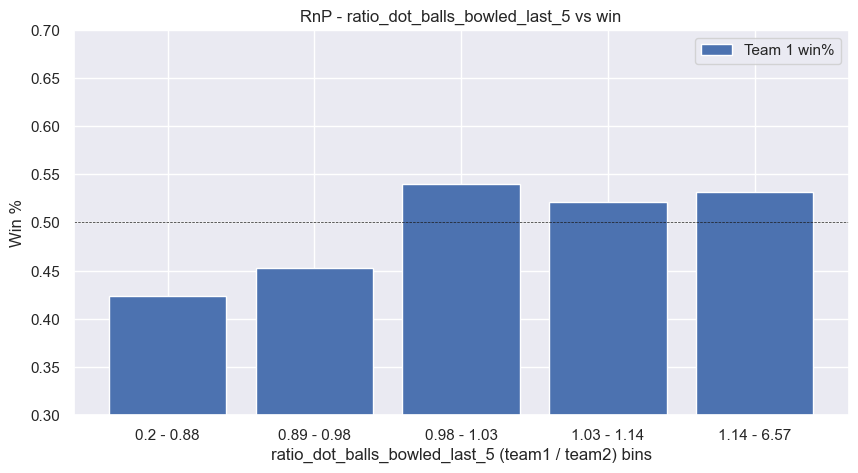

In [571]:
# RnP of team_avg_Econ_last10 computed over the train data. Slope denotes ratio of right most bin to left most bin.
createRnP(train_data, 'ratio_dot_balls_bowled_last_5')

# ###5.pitch condition <br>
## Who's winning chasing team or defending team 

In [572]:
match_lvl_data['toss_winner_01'] = (match_lvl_data['toss winner'] == match_lvl_data['team2']).astype(int)
match_lvl_data['toss_decision_01'] = (match_lvl_data['toss decision'] == 'bat').astype(int)
match_lvl_data['winner_01'] = (match_lvl_data['winner'] == match_lvl_data['team2']).astype(int)

In [573]:
match_lvl_data.sample()

match id team1 team2 winner  ... team1_bat_inning  toss_winner_01 toss_decision_01 winner_01
631  8961833   Ch    Mi    Ch     ...  1                0               1                0       

[1 rows x 34 columns]

In [574]:
def pitch_condn(ground_id, date, team1_bat_inning):
    
    # filter out games with either team1/2_id as input ground_id, match date less than current game's input date, sort desc by date, and top n rows (games) returned
    df = match_lvl_data[(match_lvl_data['match_dt']<date)].sort_values(by='match_dt', ascending=False)
    df_rel = df[df['ground_id'] == ground_id] 
    df_rel['chase_win'] = np.where(
        (((df_rel['toss_winner_01'] == 1) & (df_rel['toss_decision_01'] == 0)) | ((df_rel['toss_winner_01'] == 0) & (df_rel['toss_decision_01'] == 1))) & (df_rel['winner_01'] == 0),
        0,
        np.where(
            (((df_rel['toss_winner_01'] == 1) & (df_rel['toss_decision_01'] == 1)) | ((df_rel['toss_winner_01'] == 0) & (df_rel['toss_decision_01'] == 0))) & (df_rel['winner_01'] == 1),
            0,
            1
        )
    )
    
    if(df_rel.shape[0] != 0):
        if(team1_bat_inning == 2):
            return sum(df_rel['chase_win'])/df_rel.shape[0]
        else:
            return 1-(sum(df_rel['chase_win'])/df_rel.shape[0])
    else:
        return float('nan')

In [575]:
match_lvl_data[match_lvl_data['ground_id'] == 1469]

match id     team1     team2    winner  ... team1_bat_inning  toss_winner_01 toss_decision_01 winner_01
897   9587045   To Kt Rs  Ga An Ws  Ga An Ws  ...  1                1               0                1       
969   9262140   To Kt Rs  Ga An Ws  To Kt Rs  ...  1                1               0                0       
1196  9262126   To Kt Rs  Bs Rs     Bs Rs     ...  1                1               0                1       
1361  9587052   To Kt Rs  Bs Rs     To Kt Rs  ...  1                1               0                0       

[4 rows x 34 columns]

In [576]:
train_data['team1_bat_inning'] = np.where( ((train_data['team1']==train_data['toss winner'])&(train_data['toss decision']=='bat'))|\
                                        ((train_data['team2']==train_data['toss winner'])&(train_data['toss decision']=='field')) , 1, 2)
train_data['pitch condition'] = train_data.progress_apply(lambda x: \
            pitch_condn(x['ground_id'], x['match_dt'], x['team1_bat_inning']), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████| 948/948 [00:04<00:00, 207.18it/s]


In [577]:
train_data['pitch condition'].sample(5)

73     0.857143
540    0.357143
157    0.440000
7      0.500000
835    0.157895
Name: pitch condition, dtype: float64

slope: 0.55 / 0.47 =  1.17


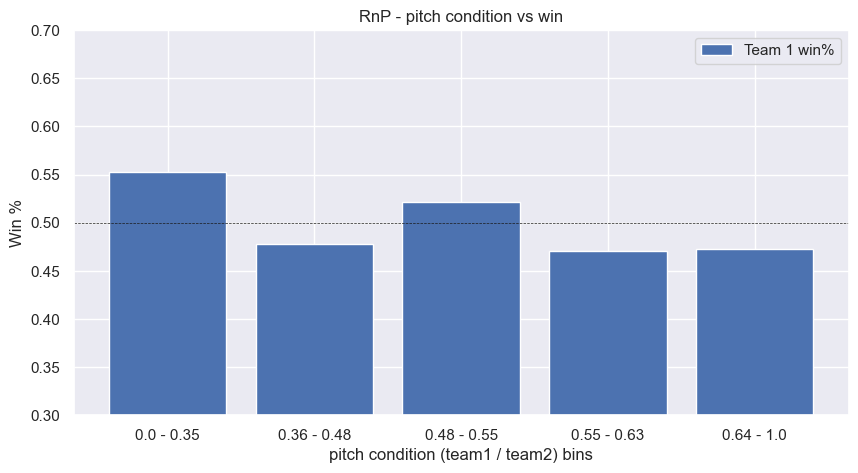

In [578]:
createRnP(train_data, 'pitch condition')

In [579]:
## Doing similar process for test dataset

test_data['team1_avg_Econ_last10'] = test_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team1_id'], x['match_dt'], 10), axis=1)
test_data['team2_avg_Econ_last10'] = test_data.progress_apply(lambda x: \
            teamAvgEconLastn(x['team2_id'], x['match_dt'], 10), axis=1)
test_data['team_avg_Econ_last10'] = (test_data['team1_avg_Econ_last10']+1)/(test_data['team2_avg_Econ_last10']+1)
test_data.drop(columns=['team1_avg_Econ_last10','team2_avg_Econ_last10'], inplace=True) # dropping intermediate columns
test_data['team1_bat_inning'] = np.where( ((test_data['team1']==test_data['toss winner'])&(test_data['toss decision']=='bat'))|\
                                        ((test_data['team2']==test_data['toss winner'])&(test_data['toss decision']=='field')) , 1, 2)
test_data['pitch condition'] = test_data.progress_apply(lambda x: \
            pitch_condn(x['ground_id'], x['match_dt'], x['team1_bat_inning']), axis=1)
test_data.shape
test_data.head(2)

100%|███████████████████████████████████████████████████████████████████████████████| 271/271 [00:01<00:00, 214.87it/s]


(271, 29)

match id     team1  team1_id  ... ratio_dot_balls_bowled_last_5 team1_bat_inning  pitch condition
0  9250275   Jy        28594     ...  1.000000                      1               NaN             
1  9262189   Ga An Ws  36084     ...  1.071743                      1                1.0            

[2 rows x 29 columns]

In [580]:
test_data['pitch condition']

0     NaN      
1      1.000000
2      0.583333
3      0.583333
4      0.500000
         ...   
266    0.818182
267    0.800000
268    0.571429
269    0.750000
270    0.666667
Name: pitch condition, Length: 271, dtype: float64

# ### 6. team_wickets_ratio_last10 <br>
# Ratio of number of wickets taken by the top 3 bowlers in the roster of a team in the last 10 games.

In [581]:
def noWsT3Lastn(player_list, date, n):
    
    player_list = str(player_list).split(':') # split string of ':' separated ids into a list of ids
    wickets_list = []
    
    for player in player_list: # loop over each player_id in roster
        df_rel = giveLastNgamesPlayer(player_id=player, date=date, n=n, bat_or_bowl='bowl') # getting bowling stats from last n games for each player
        total_wickets = np.nansum(df_rel['wicket_count']) # Sum up number of wickets for the player
        wickets_list.append((player, total_wickets)) # Append the player id and total wickets as a tuple to the list
    
    # Sort the list by total wickets in descending order and take the top 3
    top_3_bowlers = sorted(wickets_list, key=lambda x: x[1], reverse=True)[:3]
    
    # Sum up the wickets taken by the top 3 bowlers
    total_wickets_top_3 = sum([w[1] for w in top_3_bowlers])
    
    return total_wickets_top_3

In [582]:
# Applying the function to compute the number of wickets taken by top 3 bowlers for team1 and team2

tqdm.pandas() # to use progress_apply

# Training dataset
train_data['team1_wickets_top3_last10'] = train_data.progress_apply(lambda x: \
            noWsT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
train_data['team2_wickets_top3_last10'] = train_data.progress_apply(lambda x: \
            noWsT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 948/948 [00:22<00:00, 43.08it/s]


In [583]:
# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
train_data['team_wickets_ratio_last10'] = (train_data['team1_wickets_top3_last10'] + 1) / (train_data['team2_wickets_top3_last10'] + 1)
# Dropping intermediate columns
train_data.drop(columns=['team1_wickets_top3_last10', 'team2_wickets_top3_last10'], inplace=True)

In [584]:
train_data.shape
train_data.tail(2)

(948, 33)

match id  team1  team1_id  ... team1_bat_inning pitch condition  team_wickets_ratio_last10
946  9516695   Rn Rs  30428     ...  1                0.375000        0.951220                 
947  9433633   He     7727      ...  1                0.461538        0.923077                 

[2 rows x 33 columns]

slope: 0.58 / 0.42 =  1.39


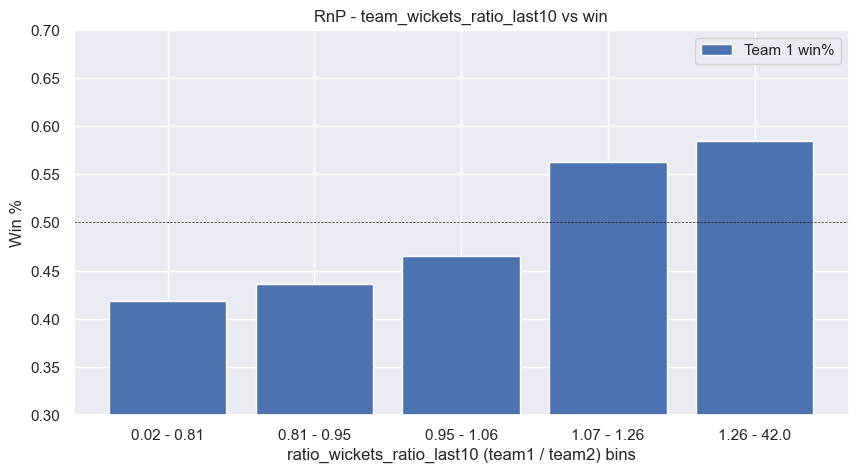

In [585]:
# RnP of team_count_50runs_last15 computed over the train data. Slope denotes ratio of right most bin to left most bin.
createRnP(train_data, 'team_wickets_ratio_last10')

In [586]:
## Doing similar process for test dataset

test_data['team1_wickets_top3_last10'] = test_data.progress_apply(lambda x: \
            noWsT3Lastn(player_list=x['team1_roster_ids'], date=x['match_dt'], n=10), axis=1)
test_data['team2_wickets_top3_last10'] = test_data.progress_apply(lambda x: \
            noWsT3Lastn(player_list=x['team2_roster_ids'], date=x['match_dt'], n=10), axis=1)

# Calculating the ratio of wickets taken by top 3 bowlers of team1 to team2
test_data['team_wickets_ratio_last10'] = (test_data['team1_wickets_top3_last10'] + 1) / (test_data['team2_wickets_top3_last10'] + 1)

# Dropping intermediate columns
test_data.drop(columns=['team1_wickets_top3_last10', 'team2_wickets_top3_last10'], inplace=True)

100%|████████████████████████████████████████████████████████████████████████████████| 271/271 [00:07<00:00, 36.86it/s]


In [587]:
test_data.shape
test_data.head(2)

(271, 30)

match id     team1  team1_id  ... team1_bat_inning pitch condition  team_wickets_ratio_last10
0  9250275   Jy        28594     ...  1               NaN              0.045455                 
1  9262189   Ga An Ws  36084     ...  1                1.0             1.085714                 

[2 rows x 30 columns]

# ### 7. percentage_runs_through_boundaries_last_5_ratio <br>
# Ratio of the runs through boundaries for the two teams in the last 5 games

In [588]:
def percentage_runs_through_boundaries(match_id, team_id, batsman_df, train_df):
    match_data = train_df[train_df['match id'] == match_id]
    
    if len(match_data) == 0:
        print(f"No match data found for Match ID: {match_id}")
        return 0
    
    if match_data.iloc[0]['team1_id'] == team_id:
        if match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==1 :
            runs_scored=match_data.iloc[0]['inning1_runs']
        elif match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==0 :
            runs_scored=match_data.iloc[0]['inning2_runs']
        elif match_data.iloc[0]['toss_winner_01']==1 and match_data.iloc[0]['toss_decision_01']==0 :
            runs_scored=match_data.iloc[0]['inning2_runs']
        else:
            runs_scored=match_data.iloc[0]['inning1_runs']
        team_roster_ids = match_data.iloc[0]['team1_roster_ids'].split(':')
    elif match_data.iloc[0]['team2_id'] == team_id:
        if match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==1 :
            runs_scored=match_data.iloc[0]['inning2_runs']
        elif match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==0 :
            runs_scored=match_data.iloc[0]['inning1_runs']
        elif match_data.iloc[0]['toss_winner_01']==1 and match_data.iloc[0]['toss_decision_01']==0 :
            runs_scored=match_data.iloc[0]['inning1_runs']
        else:
            runs_scored=match_data.iloc[0]['inning2_runs']
        team_roster_ids = match_data.iloc[0]['team2_roster_ids'].split(':')
    else:
        print(f"Team ID {team_id} not found in Match ID {match_id}")
        return 0
    
    team_roster_ids = [id.split('.')[0] for id in team_roster_ids]
    
    match_batsman_data = batsman_df[batsman_df['match id'] == match_id].copy()
    match_batsman_data['batsman_id'] = match_batsman_data['batsman_id'].astype(str).apply(lambda x: x.split('.')[0])
    
    team_batsmen = match_batsman_data[match_batsman_data['batsman_id'].isin(team_roster_ids)].copy()
    
    team_batsmen.loc[:, 'Fours'] = team_batsmen['Fours'].fillna(0)
    team_batsmen.loc[:, 'Sixes'] = team_batsmen['Sixes'].fillna(0)
    
    runs_through_boundaries = 4 * team_batsmen['Fours'].sum() + 6 * team_batsmen['Sixes'].sum()
    percentage_runs_through_boundaries=runs_through_boundaries/runs_scored
    
    return percentage_runs_through_boundaries*100

In [589]:
train_data_new1=train_data
test_data_new1=test_data

In [590]:
## Toss winner to numerical - 1 if team2 wins, else 0

train_data_new1['toss_winner_01'] = np.where(train_data['toss winner']==train_data['team2'], 1, 0)
test_data_new1['toss_winner_01'] = np.where(test_data['toss winner']==test_data['team2'], 1, 0)

In [591]:
## Toss decision - categorical - 1 if winner bats, 0 otherwise

train_data_new1['toss_decision_01'] = np.where(train_data['toss decision']=='bat', 1, 0)
test_data_new1['toss_decision_01'] = np.where(test_data['toss decision']=='bat', 1, 0)

In [592]:
percentage_runs_through_boundaries_ratio = []
for index, row in train_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    percentage_team1_runs_through_boundaries = []
    percentage_team2_runs_through_boundaries = []

    for match in team1_last_5_matches:
        percentage_team1_runs_through_boundaries.append(percentage_runs_through_boundaries(match, team1_id, batsman_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        percentage_team2_runs_through_boundaries.append(percentage_runs_through_boundaries(match, team2_id, batsman_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        percentage_runs_through_boundaries_ratio .append(1)
        continue
    percentage_runs_through_boundaries_ratio.append(((sum(percentage_team1_runs_through_boundaries)/len(team1_last_5_matches))+1)/((sum(percentage_team2_runs_through_boundaries)/len(team2_last_5_matches))+1))    

In [593]:
train_data['percentage_runs_through_boundaries_last_5_ratio']=percentage_runs_through_boundaries_ratio

In [596]:
train_data.head()

match id     team1  ...  team_wickets_ratio_last10 percentage_runs_through_boundaries_last_5_ratio
0  9331181   Ba        ...  1.391304                   0.660199                                      
1  8797060   Ed        ...  0.714286                   1.157610                                      
2  9433269   We        ...  1.212121                   0.885409                                      
3  9587073   Ga An Ws  ...  0.750000                   1.765736                                      
4  9516457   Pb Ks     ...  0.875000                   1.156035                                      

[5 rows x 34 columns]

slope: 0.56 / 0.43 =  1.31


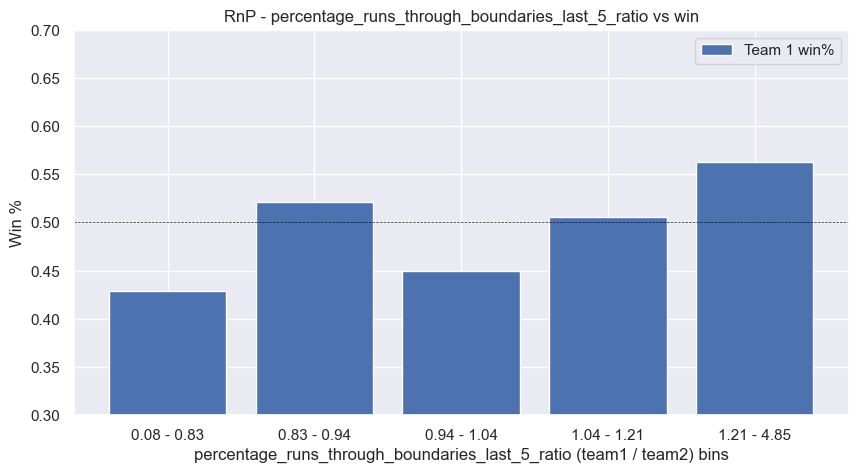

In [597]:
createRnP(train_data, 'percentage_runs_through_boundaries_last_5_ratio')

In [598]:
percentage_runs_through_boundaries_ratio = []
for index, row in test_data_new1.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    percentage_team1_runs_through_boundaries = []
    percentage_team2_runs_through_boundaries = []

    for match in team1_last_5_matches:
        percentage_team1_runs_through_boundaries.append(percentage_runs_through_boundaries(match, team1_id, batsman_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        percentage_team2_runs_through_boundaries.append(percentage_runs_through_boundaries(match, team2_id, batsman_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        percentage_runs_through_boundaries_ratio .append(1)
        continue
    percentage_runs_through_boundaries_ratio.append(((sum(percentage_team1_runs_through_boundaries)/len(team1_last_5_matches))+1)/((sum(percentage_team2_runs_through_boundaries)/len(team2_last_5_matches))+1))    

In [599]:
test_data['percentage_runs_through_boundaries_last_5_ratio']=percentage_runs_through_boundaries_ratio

In [600]:
test_data.head()

match id     team1  ...  team_wickets_ratio_last10 percentage_runs_through_boundaries_last_5_ratio
0  9250275   Jy        ...  0.045455                   1.000000                                      
1  9262189   Ga An Ws  ...  1.085714                   0.766906                                      
2  9128776   Rn Rs     ...  1.020833                   0.927606                                      
3  9586919   Ja Ts     ...  1.147059                   0.988801                                      
4  9128538   Ci Sr Ks  ...  0.959184                   0.938918                                      

[5 rows x 31 columns]

## Ratio of extras conceded in last 5 games

In [602]:
def extra_runs_given(match_id, team_id, bowler_df, train_df):
    match_data = train_df[train_df['match id'] == match_id]
    
    if len(match_data) == 0:
        print(f"No match data found for Match ID: {match_id}")
        return 0
    
    if match_data.iloc[0]['team1_id'] == team_id:
        team_roster_ids = match_data.iloc[0]['team1_roster_ids'].split(':')
    elif match_data.iloc[0]['team2_id'] == team_id:
        team_roster_ids = match_data.iloc[0]['team2_roster_ids'].split(':')
    else:
        print(f"Team ID {team_id} not found in Match ID {match_id}")
        return 0
    
    team_roster_ids = [id.split('.')[0] for id in team_roster_ids]
    
    match_bowler_data = bowler_df[bowler_df['match id'] == match_id].copy()
    match_bowler_data['bowler_id'] = match_bowler_data['bowler_id'].astype(str).apply(lambda x: x.split('.')[0])
    
    team_bowlers = match_bowler_data[match_bowler_data['bowler_id'].isin(team_roster_ids)].copy()
    
    team_bowlers.loc[:, 'wides'] = team_bowlers['wides'].fillna(0)
    team_bowlers.loc[:, 'noballs'] = team_bowlers['noballs'].fillna(0)
    
    runs_through_extras = team_bowlers['wides'].sum() + team_bowlers['noballs'].sum()
    
    return runs_through_extras

In [610]:
runs_through_extras_ratio = []
for index, row in train_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    team1_runs_through_extras = []
    team2_runs_through_extras = []

    for match in team1_last_5_matches:
        team1_runs_through_extras.append(extra_runs_given(match, team1_id, bowler_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        team2_runs_through_extras.append(extra_runs_given(match, team2_id, bowler_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        runs_through_extras_ratio .append(1)
        continue
    runs_through_extras_ratio.append(((sum(team1_runs_through_extras)/len(team1_last_5_matches))*10+1)/((sum(team2_runs_through_extras)/len(team2_last_5_matches))*10+1))    

In [611]:
train_data['runs_through_extras_last_5_ratio']=runs_through_extras_ratio

In [612]:
train_data.head()

match id     team1  ...  percentage_runs_through_boundaries_last_5_ratio runs_through_extras_last_5_ratio
0  9331181   Ba        ...  0.660199                                         1.888889                       
1  8797060   Ed        ...  1.157610                                         0.396226                       
2  9433269   We        ...  0.885409                                         1.800000                       
3  9587073   Ga An Ws  ...  1.765736                                         1.140351                       
4  9516457   Pb Ks     ...  1.156035                                         1.580645                       

[5 rows x 35 columns]

slope: 0.52 / 0.44 =  1.17


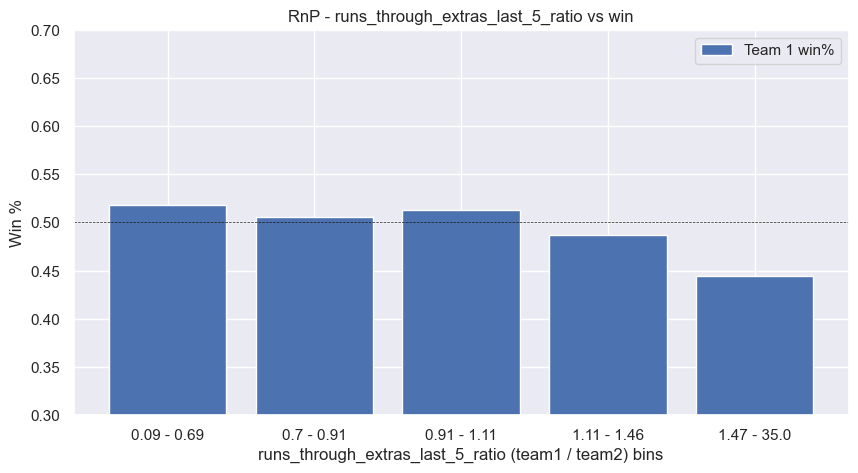

In [613]:
createRnP(train_data, 'runs_through_extras_last_5_ratio')

In [616]:
runs_through_extras_ratio = []
for index, row in test_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_5_matches = get_last_5_matches(team1_id, match_lvl_data, match_date)
    team2_last_5_matches = get_last_5_matches(team2_id, match_lvl_data, match_date)
    
    team1_runs_through_extras = []
    team2_runs_through_extras = []

    for match in team1_last_5_matches:
        team1_runs_through_extras.append(extra_runs_given(match, team1_id, bowler_lvl_data, match_lvl_data ))
    for match in team2_last_5_matches:
        team2_runs_through_extras.append(extra_runs_given(match, team2_id, bowler_lvl_data, match_lvl_data ))
    if len(team1_last_5_matches) == 0 or len(team2_last_5_matches) == 0:
        runs_through_extras_ratio .append(1)
        continue
    runs_through_extras_ratio.append(((sum(team1_runs_through_extras)/len(team1_last_5_matches))*10+1)/((sum(team2_runs_through_extras)/len(team2_last_5_matches))*10+1))    

In [617]:
test_data['runs_through_extras_last_5_ratio']=runs_through_extras_ratio

In [618]:
test_data.head()

match id     team1  ...  percentage_runs_through_boundaries_last_5_ratio runs_through_extras_last_5_ratio
0  9250275   Jy        ...  1.000000                                         1.000000                       
1  9262189   Ga An Ws  ...  0.766906                                         1.680851                       
2  9128776   Rn Rs     ...  0.927606                                         1.530612                       
3  9586919   Ja Ts     ...  0.988801                                         0.962264                       
4  9128538   Ci Sr Ks  ...  0.938918                                         2.783133                       

[5 rows x 32 columns]

## Bowling strike rate ratio

In [619]:
def bowling_strike_rate(match_id, team_id, train_df):
    match_data = train_df[train_df['match id'] == match_id]
    
    if len(match_data) == 0:
        print(f"No match data found for Match ID: {match_id}")
        return 0
    
    if match_data.iloc[0]['team1_id'] == team_id:
        if match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==1 :
            if match_data.iloc[0]['inning2_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']/match_data.iloc[0]['inning2_wickets']
        elif match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==0 :
            if match_data.iloc[0]['inning1_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']/match_data.iloc[0]['inning1_wickets']
        elif match_data.iloc[0]['toss_winner_01']==1 and match_data.iloc[0]['toss_decision_01']==0 :
            if match_data.iloc[0]['inning2_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']/match_data.iloc[0]['inning2_wickets']
        else:
            if match_data.iloc[0]['inning1_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']/match_data.iloc[0]['inning1_wickets']
    
    elif match_data.iloc[0]['team2_id'] == team_id:
        if match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==1 :
            if match_data.iloc[0]['inning1_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']/match_data.iloc[0]['inning1_wickets']
        elif match_data.iloc[0]['toss_winner_01']==0 and match_data.iloc[0]['toss_decision_01']==0 :
            if match_data.iloc[0]['inning2_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']/match_data.iloc[0]['inning2_wickets']
        elif match_data.iloc[0]['toss_winner_01']==1 and match_data.iloc[0]['toss_decision_01']==0 :
            if match_data.iloc[0]['inning1_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning1_runs']/match_data.iloc[0]['inning1_wickets']
        else:
            if match_data.iloc[0]['inning2_wickets']==0:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']
            else:
                bowl_strike_rate=match_data.iloc[0]['inning2_runs']/match_data.iloc[0]['inning2_wickets']
       
    else:
        print(f"Team ID {team_id} not found in Match ID {match_id}")
        return 0
    
    return bowl_strike_rate

In [620]:
bowling_strike_rate_ratio = []
for index, row in train_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_10_matches = get_last_10_matches(team1_id, match_lvl_data, match_date)
    team2_last_10_matches = get_last_10_matches(team2_id, match_lvl_data, match_date)
    
    team1_bowling_strike_rate = []
    team2_bowling_strike_rate = []

    for match in team1_last_10_matches:
        team1_bowling_strike_rate.append(bowling_strike_rate(match, team1_id, match_lvl_data))
    for match in team2_last_10_matches:
        team2_bowling_strike_rate.append(bowling_strike_rate(match, team2_id, match_lvl_data))
    if len(team1_last_10_matches) == 0 or len(team2_last_10_matches) == 0:
        bowling_strike_rate_ratio.append(1)
        continue
    bowling_strike_rate_ratio.append(((sum(team1_bowling_strike_rate)/len(team1_last_5_matches))+1)/((sum(team2_bowling_strike_rate)/len(team2_last_5_matches))+1))    

In [621]:
train_data['bowling_srrate_ratio_last_10']=bowling_strike_rate_ratio

In [622]:
train_data.head()

match id     team1  ...  runs_through_extras_last_5_ratio bowling_srrate_ratio_last_10
0  9331181   Ba        ...  1.888889                          1.090894                   
1  8797060   Ed        ...  0.396226                          0.874017                   
2  9433269   We        ...  1.800000                          1.392315                   
3  9587073   Ga An Ws  ...  1.140351                          0.761443                   
4  9516457   Pb Ks     ...  1.580645                          1.253476                   

[5 rows x 36 columns]

slope: 0.52 / 0.42 =  1.24


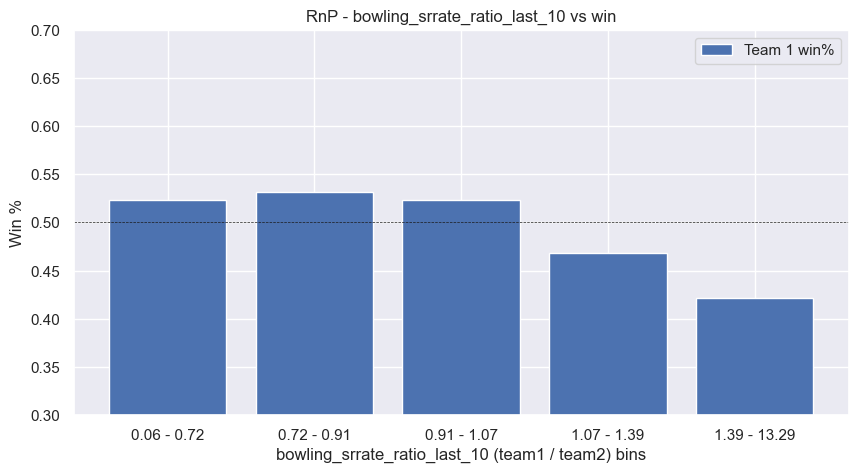

In [623]:
createRnP(train_data, 'bowling_srrate_ratio_last_10')

In [624]:
bowling_strike_rate_ratio = []
for index, row in test_data.iterrows():
    match_id = row['match id']
    team1_id = row['team1_id']
    team2_id = row['team2_id']
    match_date = row['match_dt']
    
    team1_last_10_matches = get_last_10_matches(team1_id, match_lvl_data, match_date)
    team2_last_10_matches = get_last_10_matches(team2_id, match_lvl_data, match_date)
    
    team1_bowling_strike_rate = []
    team2_bowling_strike_rate = []

    for match in team1_last_10_matches:
        team1_bowling_strike_rate.append(bowling_strike_rate(match, team1_id, match_lvl_data))
    for match in team2_last_10_matches:
        team2_bowling_strike_rate.append(bowling_strike_rate(match, team2_id, match_lvl_data))
    if len(team1_last_10_matches) == 0 or len(team2_last_10_matches) == 0:
        bowling_strike_rate_ratio.append(1)
        continue
    bowling_strike_rate_ratio.append(((sum(team1_bowling_strike_rate)/len(team1_last_5_matches))+1)/((sum(team2_bowling_strike_rate)/len(team2_last_5_matches))+1))    

In [625]:
test_data['bowling_srrate_ratio_last_10']=bowling_strike_rate_ratio

In [626]:
test_data.head()

match id     team1  ...  runs_through_extras_last_5_ratio bowling_srrate_ratio_last_10
0  9250275   Jy        ...  1.000000                          1.000000                   
1  9262189   Ga An Ws  ...  1.680851                          0.818797                   
2  9128776   Rn Rs     ...  1.530612                          1.330120                   
3  9586919   Ja Ts     ...  0.962264                          1.088574                   
4  9128538   Ci Sr Ks  ...  2.783133                          4.004720                   

[5 rows x 33 columns]

slope: 0.49 / 0.45 =  1.08


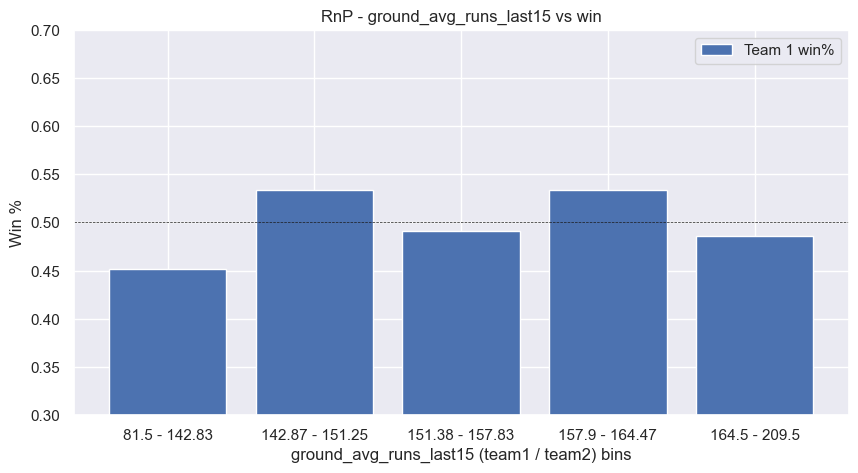

In [1670]:
createRnP(train_data, 'ground_avg_runs_last15')

slope: 0.52 / 0.45 =  1.17


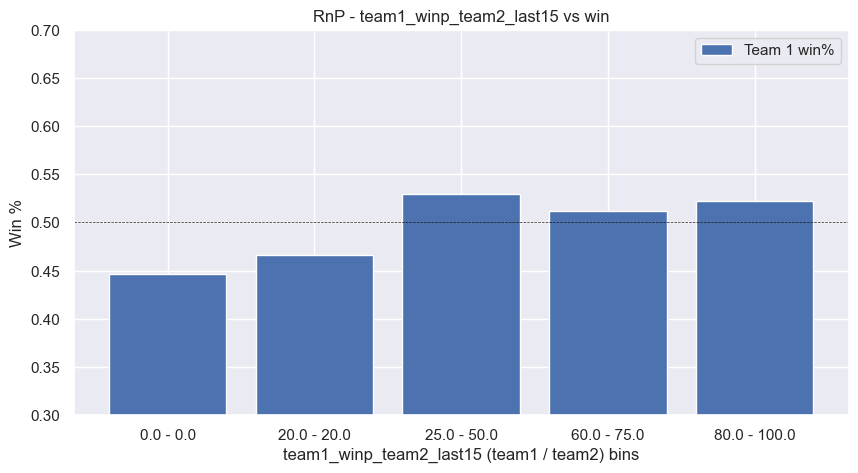

In [1671]:
createRnP(train_data, 'team1_winp_team2_last15')

slope: 0.52 / 0.46 =  1.14


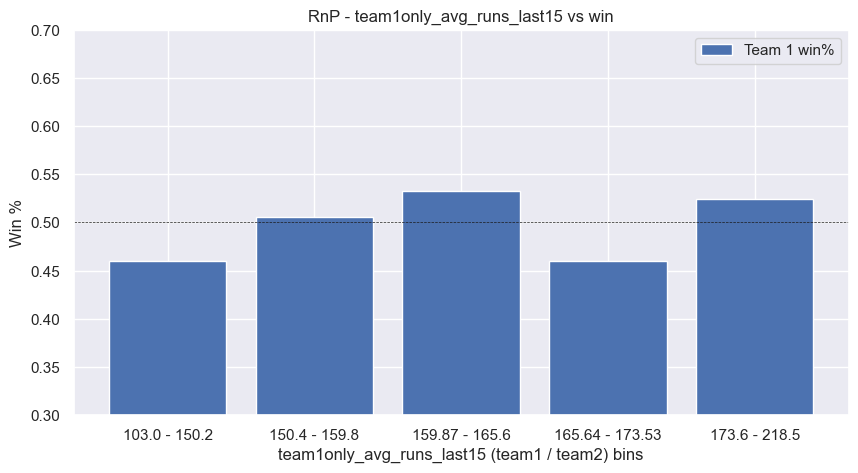

In [1672]:
createRnP(train_data, 'team1only_avg_runs_last15')

#### Selecting relevant columns

In [2013]:
X,y = train_data[['team_count_50runs_last15','team_winp_last5','team1only_avg_runs_last15','ratio_dot_balls_bowled_last_5','pitch condition','team_wickets_ratio_last10','percentage_runs_through_boundaries_last_5_ratio','team_runs_ratio_last10','team_srrate_ratio_last10','bowling_srrate_ratio_last_10']], train_data['winner_01']

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

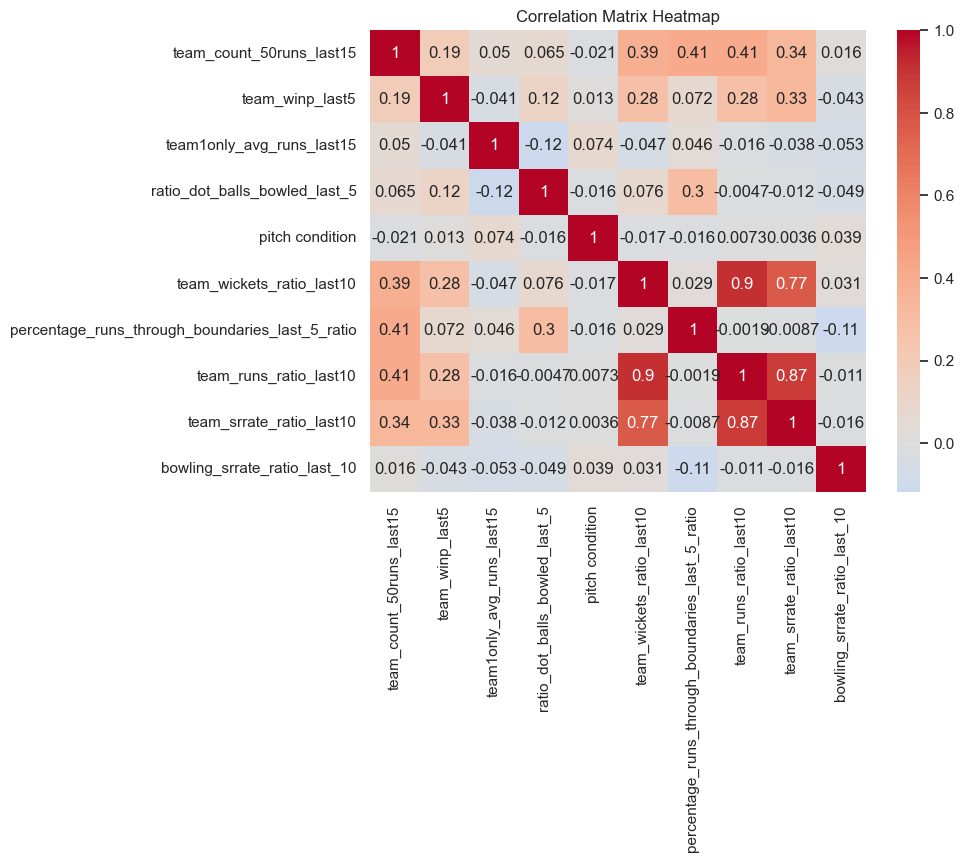

In [2010]:
# Assuming X is your DataFrame
numeric_X = X.select_dtypes(include=[np.number])
correlation_matrix = numeric_X.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [2008]:
corr_mat

team_count_50runs_last15  ...  bowling_srrate_ratio_last_10
team_count_50runs_last15                         1.000000                  ...  0.016042                    
team_winp_last5                                  0.189816                  ... -0.043028                    
team1only_avg_runs_last15                        0.050201                  ... -0.053091                    
ratio_dot_balls_bowled_last_5                    0.065426                  ... -0.049112                    
pitch condition                                 -0.021150                  ...  0.038994                    
team_wickets_ratio_last10                        0.386343                  ...  0.031259                    
percentage_runs_through_boundaries_last_5_ratio  0.411059                  ... -0.113561                    
team_runs_ratio_last10                           0.412169                  ... -0.010970                    
team_srrate_ratio_last10                         0.341871                  ... -0.015554                    
bowling_srrate_ratio_last_10                     0.016042                  ...  1.000000                    

[10 rows x 10 columns]

In [760]:
X_test = test_data[X.columns.tolist()]

#### Imputation

In [296]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

index   0
4  team1only_avg_runs_last15      21
6  ground_avg_runs_last15         53
7  team_avg_Econ_last10           35
8  pitch condition                53
9  ratio_dot_balls_bowled_last_5  42

index   0
4  team1only_avg_runs_last15      7 
6  ground_avg_runs_last15         10
7  team_avg_Econ_last10           9 
8  pitch condition                10
9  ratio_dot_balls_bowled_last_5  15

In [297]:
X.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

C:\Users\adrij\AppData\Local\Temp\ipykernel_30968\1698769224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
C:\Users\adrij\AppData\Local\Temp\ipykernel_30968\1698769224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


In [298]:
X_nans = X.isna().sum().reset_index()
X_nans[X_nans[0]!=0]

X_test_nans = X_test.isna().sum().reset_index()
X_test_nans[X_test_nans[0]!=0]

Empty DataFrame
Columns: [index, 0]
Index: []

Empty DataFrame
Columns: [index, 0]
Index: []

### Stats

In [299]:
X['toss_winner_01'].value_counts()
X['toss_decision_01'].value_counts()
X['team_count_50runs_last15'].describe()

toss_winner_01
1    620
0    328
Name: count, dtype: int64

toss_decision_01
0    617
1    331
Name: count, dtype: int64

count    948.000000
mean     1.202602  
std      1.008793  
min      0.083333  
25%      0.686678  
50%      1.000000  
75%      1.400000  
max      11.000000 
Name: team_count_50runs_last15, dtype: float64

## Model

#### 1. XGB

In [300]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [301]:
# User-defined parameters
algo_name = 'XGBClassifier'
is_ensemble = 'no'
n_trees = 13
depth = 2
lr = 0.17

##### Initialize and train the model

In [302]:
clf_xgb = XGBClassifier(
    n_estimators=n_trees,
    max_depth=depth,
    learning_rate=lr,
    use_label_encoder=False,
    eval_metric='logloss'
).fit(X, y)

In [303]:
# Predict on training and test data
train_data['y_pred_01'] = clf_xgb.predict(X)
test_data['y_pred_01'] = clf_xgb.predict(X_test)

In [304]:
# Train accuracy
print(classification_report(y, clf_xgb.predict(X), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       468
           1       0.66      0.65      0.66       480

    accuracy                           0.66       948
   macro avg       0.66      0.66      0.66       948
weighted avg       0.66      0.66      0.66       948



In [305]:
# Predict probabilities
train_data['win_pred_score'] = clf_xgb.predict_proba(X)[:, 1]
test_data['win_pred_score'] = clf_xgb.predict_proba(X_test)[:, 1]

##### Adjust win_pred_score for the winning team

In [306]:
train_data['win_pred_score'] = np.where(
    train_data['y_pred_01'] == 0, 
    1 - train_data['win_pred_score'], 
    train_data['win_pred_score']
)
test_data['win_pred_score'] = np.where(
    test_data['y_pred_01'] == 0, 
    1 - test_data['win_pred_score'], 
    test_data['win_pred_score']
)

##### Determine winner_team_id from custom dependent column

In [307]:
train_data['win_pred_team_id'] = np.where(
    train_data['y_pred_01'] == 0, 
    train_data['team1_id'], 
    train_data['team2_id']
)
test_data['win_pred_team_id'] = np.where(
    test_data['y_pred_01'] == 0, 
    test_data['team1_id'], 
    test_data['team2_id']
)

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

In [2014]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [2015]:
import pandas as pd

# Check for missing values in X_train
X_train_nans = X_train.isna().sum().reset_index()
print("Columns with missing values in X_train:")
print(X_train_nans[X_train_nans[0] != 0])

# Check for missing values in X_test
X_test_nans = X_test.isna().sum().reset_index()
print("Columns with missing values in X_test:")
print(X_test_nans[X_test_nans[0] != 0])

# # Impute missing values in 'ground_avg_runs_last15' with the mean of that column
# ground_avg_runs_last15_mean_train = X_train['ground_avg_runs_last15'].mean()
# ground_avg_runs_last15_mean_test = X_test['ground_avg_runs_last15'].mean()

# X_train['ground_avg_runs_last15'].fillna(ground_avg_runs_last15_mean_train, inplace=True)
# X_test['ground_avg_runs_last15'].fillna(ground_avg_runs_last15_mean_test, inplace=True)

# Impute missing values in all other columns with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Confirm no more missing values in X_train
X_train_nans_after = X_train.isna().sum().reset_index()
print("Columns with missing values in X_train after imputation:")
print(X_train_nans_after[X_train_nans_after[0] != 0])

# Confirm no more missing values in X_test
X_test_nans_after = X_test.isna().sum().reset_index()
print("Columns with missing values in X_test after imputation:")
print(X_test_nans_after[X_test_nans_after[0] != 0])


Columns with missing values in X_train:
                       index   0
2  team1only_avg_runs_last15  19
4  pitch condition            41
Columns with missing values in X_test:
                       index   0
2  team1only_avg_runs_last15  2 
4  pitch condition            12
Columns with missing values in X_train after imputation:
Empty DataFrame
Columns: [index, 0]
Index: []
Columns with missing values in X_test after imputation:
Empty DataFrame
Columns: [index, 0]
Index: []


In [1960]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [1998]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss',random_state=42)
xgb_param_grid = {
    'n_estimators': [10,12,13,14,16,18,20,30,40,50],
    'max_depth': [2,3, 4, 6],
    'learning_rate': [0.01,0.03,0.05,0.1,0.12,0.14,0.16, 0.2]
}

# LightGBM
lgbm = LGBMClassifier(random_state=42)
lgbm_param_grid = {
    'n_estimators': [10,12,13,14,16,18,20,30,40,50],
    'max_depth': [2,3, 4, 6],
    'learning_rate': [0.01,0.03,0.05,0.1,0.12,0.14,0.16, 0.2]
}

# CatBoost
catboost = CatBoostClassifier(verbose=0,random_state=42)
catboost_param_grid = {
    'n_estimators': [10,12,13,14,16,18,20,30,40,50],
    'max_depth': [2,3, 4, 6],
    'learning_rate': [0.01,0.03,0.05,0.1,0.12,0.14,0.16, 0.2]
}

# GBM
gbm = GradientBoostingClassifier(random_state=42)
gbm_param_grid = {
    'n_estimators': [10,12,13,14,16,18,20,30,40,50],
    'max_depth': [2,3, 4, 6],
    'learning_rate': [0.01,0.03,0.05,0.1,0.12,0.14,0.16, 0.2]
}

In [1999]:
# Function to perform GridSearchCV
def grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=1)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_


In [2000]:
# Perform grid search
xgb_best = grid_search(xgb, xgb_param_grid, X_train, y_train)
lgbm_best = grid_search(lgbm, lgbm_param_grid, X_train, y_train)
catboost_best = grid_search(catboost, catboost_param_grid, X_train, y_train)
gbm_best = grid_search(gbm, gbm_param_grid, X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters for XGBClassifier: {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 50}
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 311, number of negative: 295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1626
[LightGBM] [Info] Number of data points in the train set: 606, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513201 -> initscore=0.052818
[LightGBM] [Info] Start training from score 0.052818
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [2001]:
estimators = [
    ('xgb', xgb_best),
    ('lgbm', lgbm_best),
    ('catboost', catboost_best),
    ('gbm', gbm_best)
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 389, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1989
[LightGBM] [Info] Number of data points in the train set: 758, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513193 -> initscore=0.052783
[LightGBM] [Info] Start training from score 0.052783
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lear...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [2002]:
# Predict on the test set
y_pred = stacking_clf.predict(X_train)

# Classification report
print("Classification report on train set:")
print(classification_report(y_train, y_pred))

Classification report on train set:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54       369
           1       0.55      0.54      0.55       389

    accuracy                           0.54       758
   macro avg       0.54      0.54      0.54       758
weighted avg       0.54      0.54      0.54       758



In [2003]:
# Predict on the test set
y_pred = stacking_clf.predict(X_test)

# Classification report
print("Classification report on test set:")
print(classification_report(y_test, y_pred))

Classification report on test set:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        99
           1       0.51      0.54      0.52        91

    accuracy                           0.53       190
   macro avg       0.53      0.53      0.53       190
weighted avg       0.53      0.53      0.53       190



In [2011]:
# Define GBM model
gbm = GradientBoostingClassifier()

# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a stacking classifier with GBM as the first level and XGBoost as the final estimator
stacking_clf = StackingClassifier(
    estimators=[('gbm', gbm)],
    final_estimator=xgb,
    passthrough=True  # This will pass the original features along with the GBM predictions to XGBoost
)

In [2012]:

# Define hyperparameter grid
param_grid = {
    'gbm__n_estimators': [10,11,12,13,14,15,17,20, 50],
    'gbm__learning_rate': [0.05, 0.07,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18],
    'gbm__max_depth': [2,3,4],
    'final_estimator__n_estimators': [10,11,12,13,14,15,17,20, 50],
    'final_estimator__learning_rate': [0.05, 0.07,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18],
    'final_estimator__max_depth': [2,3,4]
}


In [2016]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# Predict on the test set
y_pred_test = grid_search.best_estimator_.predict(X_test)
y_pred_train = grid_search.best_estimator_.predict(X_train)

# Print classification report
print("Classification report on training set:")
print(classification_report(y_train, y_pred_train))


In [ ]:
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))


In [1977]:
clf = XGBClassifier(
    n_estimators=20,
    max_depth=4,
    learning_rate=0.05,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [1978]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=20,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [1979]:
# Train accuracy
y_pred_train = clf.predict(X_train)
print("Classification report on training set:")
print(classification_report(y_train, y_pred_train))


Classification report on training set:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       369
           1       0.75      0.81      0.78       389

    accuracy                           0.76       758
   macro avg       0.76      0.76      0.76       758
weighted avg       0.76      0.76      0.76       758



In [1980]:
y_pred_test = clf.predict(X_test)
print("Classification report on test set:")
print(classification_report(y_test, y_pred_test))

Classification report on test set:
              precision    recall  f1-score   support

           0       0.51      0.42      0.46        99
           1       0.47      0.56      0.51        91

    accuracy                           0.49       190
   macro avg       0.49      0.49      0.49       190
weighted avg       0.49      0.49      0.49       190



#### Feature importance

In [308]:
df_feat_importance = pd.DataFrame({
    'feat_name': X.columns.tolist(), 
    'model_feat_imp_train': clf_xgb.feature_importances_
}).sort_values(by='model_feat_imp_train', ascending=False).reset_index(drop=True).head(10)

df_feat_importance

feat_name  model_feat_imp_train
0  team_count_50runs_last15          0.108962            
1  team_runs_ratio_last10            0.095949            
2  team_wickets_ratio_last10         0.095314            
3  ground_avg_runs_last15            0.092224            
4  team_srrate_ratio_last10          0.083282            
5  bowling_srrate_ratio_last_10      0.075311            
6  team_avg_Econ_last10              0.074607            
7  team1only_avg_runs_last15         0.072375            
8  runs_through_extras_last_5_ratio  0.070023            
9  team_winp_last5                   0.069358

#### 2. GBM

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [123]:
# user-defined parameters

algo_name = 'GradientBoostingClassifier'
is_ensemble = 'no'
n_trees = 13
depth = 2
lr = 0.15

##### Train

In [124]:
clf_gbm = GradientBoostingClassifier(n_estimators = n_trees, max_depth = depth, learning_rate = lr).fit(X,y)

In [125]:
train_data['y_pred_01'] = clf_gbm.predict(X)
test_data['y_pred_01'] = clf_gbm.predict(X_test)

In [126]:
from sklearn.metrics import classification_report

In [127]:
# Train accuracy
print(classification_report(y, clf_gbm.predict(X), labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67       468
           1       0.67      0.64      0.66       480

    accuracy                           0.66       948
   macro avg       0.66      0.66      0.66       948
weighted avg       0.66      0.66      0.66       948



In [128]:
train_data['win_pred_score'] = clf_gbm.predict_proba(X)[:,1]
test_data['win_pred_score'] = clf_gbm.predict_proba(X_test)[:,1]

##### Getting win_pred_score corresponding to winner team

In [129]:
train_data['win_pred_score'] = np.where( (train_data['y_pred_01']==0), (1-train_data['win_pred_score']), train_data['win_pred_score'])
test_data['win_pred_score'] = np.where( (test_data['y_pred_01']==0), (1-test_data['win_pred_score']), test_data['win_pred_score'])

##### Getting winner_team_id from custom dependent column

In [130]:
train_data['win_pred_team_id'] = np.where( (train_data['y_pred_01']==0), (train_data['team1_id']), train_data['team2_id'])
test_data['win_pred_team_id'] = np.where( (test_data['y_pred_01']==0), (test_data['team1_id']), test_data['team2_id'])

#### Feature importance

In [131]:
df_feat_importance = pd.DataFrame({'feat_name':X.columns.tolist(), 'model_feat_imp_train':clf_gbm.feature_importances_}).sort_values(by='model_feat_imp_train', ascending=False)\
                                                                                                                        .reset_index(drop=True).head(10)
df_feat_importance

feat_name  model_feat_imp_train
0  team_wickets_ratio_last10                        0.252174            
1  team_count_50runs_last15                         0.149848            
2  team_runs_ratio_last10                           0.141280            
3  ratio_dot_balls_bowled_last_5                    0.121261            
4  team_srrate_ratio_last10                         0.104608            
5  team_avg_Econ_last10                             0.078827            
6  team1only_avg_runs_last15                        0.048696            
7  percentage_runs_through_boundaries_last_5_ratio  0.029329            
8  ground_avg_runs_last15                           0.028960            
9  pitch condition                                  0.028866

#### 3. CatBoost

In [132]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [133]:
# User-defined parameters
algo_name = 'CatBoostClassifier'
is_ensemble = 'no'
n_trees = 13
depth = 2
lr = 0.17

##### Train

In [107]:
clf_catboost = CatBoostClassifier(
    iterations=n_trees,
    depth=depth,
    learning_rate=lr,
    eval_metric='Logloss',
    verbose=0
).fit(X, y)

In [108]:
# Predict on training and test data
train_data['y_pred_01'] = clf_catboost.predict(X)
test_data['y_pred_01'] = clf_catboost.predict(X_test)

In [109]:
# Train accuracy
print(classification_report(y, clf_catboost.predict(X), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       468
           1       0.61      0.66      0.63       480

    accuracy                           0.61       948
   macro avg       0.61      0.61      0.61       948
weighted avg       0.61      0.61      0.61       948



In [110]:
# Predict probabilities
train_data['win_pred_score'] = clf_catboost.predict_proba(X)[:, 1]
test_data['win_pred_score'] = clf_catboost.predict_proba(X_test)[:, 1]

##### Getting win_pred_score corresponding to winner team

In [111]:
train_data['win_pred_score'] = np.where(
    train_data['y_pred_01'] == 0, 
    1 - train_data['win_pred_score'], 
    train_data['win_pred_score']
)
test_data['win_pred_score'] = np.where(
    test_data['y_pred_01'] == 0, 
    1 - test_data['win_pred_score'], 
    test_data['win_pred_score']
)

##### Getting winner_team_id from custom dependent column

In [112]:
train_data['win_pred_team_id'] = np.where(
    train_data['y_pred_01'] == 0, 
    train_data['team1_id'], 
    train_data['team2_id']
)
test_data['win_pred_team_id'] = np.where(
    test_data['y_pred_01'] == 0, 
    test_data['team1_id'], 
    test_data['team2_id']
)

#### Feature importance

In [113]:
df_feat_importance = pd.DataFrame({
    'feat_name': X.columns.tolist(), 
    'model_feat_imp_train': clf_catboost.get_feature_importance()
}).sort_values(by='model_feat_imp_train', ascending=False).reset_index(drop=True).head(10)

df_feat_importance

feat_name  model_feat_imp_train
0  team_runs_ratio_last10         29.508450           
1  team_wickets_ratio_last10      22.203765           
2  team_count_50runs_last15       12.308312           
3  ratio_dot_balls_bowled_last_5  11.108297           
4  team1only_avg_runs_last15      5.031152            
5  pitch condition                4.993971            
6  ground_avg_runs_last15         4.752756            
7  team_srrate_ratio_last10       4.091970            
8  team1_winp_team2_last15        3.617586            
9  team_avg_Econ_last10           2.243841

#### 4. LGBM

In [114]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

In [115]:
# User-defined parameters
algo_name = 'LGBMClassifier'
is_ensemble = 'no'
n_trees = 13
depth = 2
lr = 0.17

##### Train

In [116]:
# Initialize and train the model
clf_lgbm = LGBMClassifier(
    n_estimators=n_trees,
    max_depth=depth,
    learning_rate=lr,
    objective='binary'
).fit(X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 480, number of negative: 468
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2311
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506329 -> initscore=0.025318
[LightGBM] [Info] Start training from score 0.025318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [117]:
# Predict on training and test data
train_data['y_pred_01'] = clf_lgbm.predict(X)
test_data['y_pred_01'] = clf_lgbm.predict(X_test)

In [118]:
# Train accuracy
print(classification_report(y, clf_lgbm.predict(X), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.64      0.69      0.66       468
           1       0.67      0.62      0.64       480

    accuracy                           0.65       948
   macro avg       0.65      0.65      0.65       948
weighted avg       0.65      0.65      0.65       948



In [119]:
# Predict probabilities
train_data['win_pred_score'] = clf_lgbm.predict_proba(X)[:, 1]
test_data['win_pred_score'] = clf_lgbm.predict_proba(X_test)[:, 1]

##### Getting win_pred_score corresponding to winner team

In [120]:
train_data['win_pred_score'] = np.where(
    train_data['y_pred_01'] == 0, 
    1 - train_data['win_pred_score'], 
    train_data['win_pred_score']
)
test_data['win_pred_score'] = np.where(
    test_data['y_pred_01'] == 0, 
    1 - test_data['win_pred_score'], 
    test_data['win_pred_score']
)

##### Getting winner_team_id from custom dependent column

In [121]:
train_data['win_pred_team_id'] = np.where(
    train_data['y_pred_01'] == 0, 
    train_data['team1_id'], 
    train_data['team2_id']
)
test_data['win_pred_team_id'] = np.where(
    test_data['y_pred_01'] == 0, 
    test_data['team1_id'], 
    test_data['team2_id']
)

#### Feature importance

In [122]:
df_feat_importance = pd.DataFrame({
    'feat_name': X.columns.tolist(), 
    'model_feat_imp_train': clf_lgbm.feature_importances_
}).sort_values(by='model_feat_imp_train', ascending=False).reset_index(drop=True).head(10)

df_feat_importance

feat_name  model_feat_imp_train
0  team_wickets_ratio_last10                        10                  
1  team_srrate_ratio_last10                         6                   
2  team_count_50runs_last15                         4                   
3  team_runs_ratio_last10                           4                   
4  team_avg_Econ_last10                             3                   
5  ratio_dot_balls_bowled_last_5                    3                   
6  team1only_avg_runs_last15                        2                   
7  ground_avg_runs_last15                           2                   
8  percentage_runs_through_boundaries_last_5_ratio  2                   
9  team_winp_last5                                  1

## File preparation

#### File 1

In [204]:
train_data['dataset_type'] = 'train'
test_data['dataset_type'] = 'r1'

In [206]:
## refactor

df_file1 = pd.concat([test_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))], \
                     train_data[['match id','dataset_type','win_pred_team_id','win_pred_score',] + list(df_feat_importance['feat_name'].head(10))]])

renaming_dict = {}
for i,col in enumerate(list(df_feat_importance['feat_name'].head(10))):
    renaming_dict[col] = f'indep_feat_id{i+1}'
df_file1.rename(columns=renaming_dict, inplace=True)

for i in range(1,11):
    if f'indep_feat_id{i}' not in df_file1.columns:
        df_file1[f'indep_feat_id{i}'] = np.nan

df_file1['train_algorithm'] = algo_name
df_file1['is_ensemble'] = is_ensemble
df_file1['train_hps_trees'] = n_trees
df_file1['train_hps_depth'] = depth
df_file1['train_hps_lr'] = lr

In [208]:
df_file1.shape
df_file1.head()

(1219, 19)

match id dataset_type  win_pred_team_id  win_pred_score  ...  is_ensemble  train_hps_trees  train_hps_depth  train_hps_lr
0  9250275   r1           90                0.795567        ...  no           13               2                0.17        
1  9262189   r1           36084             0.522477        ...  no           13               2                0.17        
2  9128776   r1           48334             0.586971        ...  no           13               2                0.17        
3  9586919   r1           36098             0.514401        ...  no           13               2                0.17        
4  9128538   r1           30414             0.509946        ...  no           13               2                0.17        

[5 rows x 19 columns]

#### File 2

In [221]:
feature_desc = {
    'team_count_50runs_last15': 'Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games',
    'team_winp_last5': 'Ratio of team1\'s win % to team2\'s win % in last 5 games',
    'ground_avg_runs_last15': 'Average runs scored in the ground in last 15 games',
    'team1_winp_team2_last15': 'Team1\'s win percentage against Team2 in last 15 games',
    'team1only_avg_runs_last15': 'Team1\'s average inning runs in last 15 games',
    'season_num': 'Numerical form of season. Takes 1 for oldest season and increases for latest seasons.',
    'toss_winner_01': 'Toss winner to numerical - 1 if team2 wins, else 0',
    'toss_decision_01': 'Toss decision - categorical - 1 if winner bats, 0 otherwise',
    'team_avg_Econ_last10': 'Ratio of team\'s average inning economy rate in last 10 games',
    'team_srrate_ratio_last10': 'Ratio of the average weighted strike rate of the top 3 batsmen in the last 10 games',
    'team_runs_ratio_last10': 'Ratio of runs scored by top 3 batsmen of both teams in the last 10 games',
    'percentage_dot_balls_bowled_last_5': 'Ratio of percentage of dot balls bowled by each team in the last 5 games',
    'pitch_condition': 'Indicator of which team (chasing or defending) wins more often on this pitch',
    'team_wickets_ratio_last10': 'Ratio of number of wickets taken by the top 3 bowlers in the roster of a team in the last 10 games',
    'percentage_runs_through_boundaries_last_5_ratio': 'Ratio of the runs through boundaries for the two teams in the last 5 games'
}

In [223]:
# df_feat_importance.rename(index={0:'feat_id'}, inplace=True)
df_file2 = df_feat_importance
df_file2['feat_id'] = [i+1 for i in df_file2.index]
df_file2['feat_rank_train'] = [i+1 for i in df_file2.index]
df_file2 = df_file2.set_index('feat_id')
df_file2['feat_description'] = df_file2['feat_name'].map(feature_desc)

In [225]:
df_file2

feat_name  ...                                                                                    feat_description
feat_id                                                   ...                                                                                                    
1        team_count_50runs_last15                         ...  Ratio of number of 50s by players in team1 to number of 50s by players in team2 in last 15 games  
2        team_runs_ratio_last10                           ...  Ratio of runs scored by top 3 batsmen of both teams in the last 10 games                          
3        team_wickets_ratio_last10                        ...  Ratio of number of wickets taken by the top 3 bowlers in the roster of a team in the last 10 games
4        team_avg_Econ_last10                             ...  Ratio of team's average inning economy rate in last 10 games                                      
5        percentage_runs_through_boundaries_last_5_ratio  ...  Ratio of the runs through boundaries for the two teams in the last 5 games                        
6        team_srrate_ratio_last10                         ...  Ratio of the average weighted strike rate of the top 3 batsmen in the last 10 games               
7        team1only_avg_runs_last15                        ...  Team1's average inning runs in last 15 games                                                      
8        team1_winp_team2_last15                          ...  Team1's win percentage against Team2 in last 15 games                                             
9        percentage_dot_balls_bowled_last_5               ...  Ratio of percentage of dot balls bowled by each team in the last 5 games                          
10       team_winp_last5                                  ...  Ratio of team1's win % to team2's win % in last 5 games                                           

[10 rows x 4 columns]

## Save

In [230]:
df_file1.to_csv('file1.csv', index=False)
df_file2.to_csv('file2.csv')